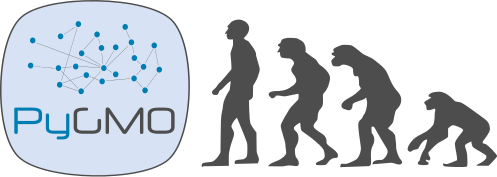

# Cómo implementar un problema de optimizaciónm con pygmo

Aquí vemos cómo codificar problemas simples de optimización (continuo, objetivo único, sin restricciones), para que pygmo pueda aplicar toda su potencia algorítmica para resolverlo. Sencillamente, hay que implementar un clase con la función de fitness 

## Optimización con un objetivo

Implementación de la clase que define el problema

La función objetivo es:
$f(x)=\sum_{i=1}^{n} x_i^2$ 

In [1]:
class my_problem:

    def __init__(self,):

        self.dimension = 10
    
    def get_bounds(self):
        minValues = []
        maxValues = []
        for i in range(self.dimension):
            minValues.append(-5.12)
            maxValues.append(5.12)

        return (minValues, maxValues)
    
    # Función de fitness
    def fitness(self, x):

        f = sum([x[i] ** 2 for i in range(self.dimension)])
        return [f]
    
    def get_nobj(self):
        return 1
    
    def get_nec(self):
        return 0

Hay que tener en cuenta que, por defecto, pygmo asumirá que se quiere minimizar la función objetivo. Para crear una maximización simplemente multiplicar por -1

Para resolver este problema, utilizaremos el algoritmo Enjambre de partículas con 20 individuos.

In [2]:
from pygmo import *

prob = problem(my_problem())  # Creaar un problema 10-dimensional
algo = algorithm(pso(gen=500))  # 500 generaciones de pso
#algo = algorithm(sga(gen=500))  # 500 generaciones de sga
pop_size = 20
pop = population(prob, pop_size)
pop = algo.evolve(pop)
print(pop.champion_f[0])
print(pop.champion_x)

5.482624261494326e-16
[ 2.66908586e-09  2.19009987e-09 -1.69363617e-09  1.11301837e-08
 -3.54203536e-09  4.94067982e-09  1.42852578e-09 -1.64508337e-08
 -1.69584507e-09  9.85340748e-09]


In [3]:
prob = problem(my_problem())  # Creaar un problema 10-dimensional
algo = algorithm(sga(gen=500))  # 500 generaciones de sga
pop_size = 20
pop = population(prob, pop_size)
pop = algo.evolve(pop)
print(pop.champion_f[0])
print(pop.champion_x)

0.004483404644129198
[-0.00510948 -0.01038044 -0.01256911  0.01056278 -0.05455226  0.02482072
 -0.00971061  0.01917208 -0.00415329  0.00297625]


## Problema Multi-objetivo

Se puede definir también un problema múltiples objetivos.
En ese caso, hay que devolver una tupla o una lista con más de un elemento en la implementación de la función objetivo.

Vamos a resolver el problema multi-objetivo denominado como ZDT-1
https://sop.tik.ee.ethz.ch/download/supplementary/testproblems/zdt1/index.php

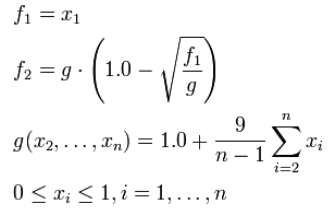

In [4]:
import numpy as np
class my_mo_problem:
     
    def __init__(self,):
        self.dimension = 2
    
    def get_bounds(self):
        minValues = []
        maxValues = []
        for i in range(self.dimension):
            minValues.append(0.0)
            maxValues.append(1.0)

        return (minValues, maxValues)

    def fitness(self, x):
        f0 = x[0]
        g = 1.0 + 9 * x[1]
        f1 = g * (1.0 - np.sqrt(f0 / g))
        return [f0, f1]
    
    def get_nobj(self):
        return 2
    
    def get_nec(self):
        # return 14
        return 0
    # Add some output to __repr__
    def human_readable_extra(self):
        return "\n\tMulti-Objective problem"

Aplicamos nuestro problema como antes, pero esta vez usamos uno de los algoritmos de objetivos múltiples disponibles en pygmo:

In [5]:
from pygmo import *

prob = my_mo_problem()
algo = algorithm(nsga2(gen=2000))  # 2000 generations of NSGA-II should solve it
pop_size = 32
pop = population(prob, pop_size)
pop = algo.evolve(pop)
#print(pop.get_f())

Dado que en la aproximación multi-objetivo, la idea de una única solución 'ganadora' no está muy bien definida, trazamos el frente de Pareto de toda la población, es decir, los dos objetivos $f_i^{(1)}$ y $f_i^{(2)}$ para cada individuo $i \in 1,\ldots,30$.

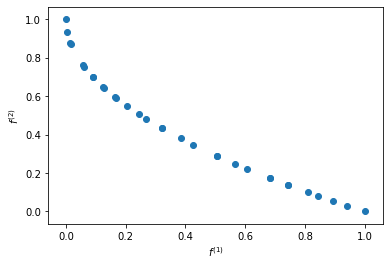

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

F = np.array(pop.get_f()).T
plt.scatter(F[0], F[1])
plt.xlabel("$f^{(1)}$")
plt.ylabel("$f^{(2)}$")
plt.show()

# Ejercicio 1

### Resuelve el mismo problema para un número indeterminado de variables de optimización

# Ejercicio 2

### Recupera la función bidimensional del ejercio de scipy y resuelvela con pygmo

$$ f(x,y) = \sin^{2}\left(3\pi x\right)+\left(x-1\right)^{2}\left(1+\sin^{2}\left(3\pi y\right)\right)+\left(y-1\right)^{2}\left(1+\sin^{2}\left(2\pi y\right)\right) $$